In [63]:

from query_reader import QueryReader 
import pandas as pd
import psycopg2.extras
import psycopg2
import time
import os

query_dir = os.path.join(os.path.abspath(''), 'queries')
qr = QueryReader(query_dir)
BASE_DATE = "'2021-05-01'"

def create_connection(): 
    return psycopg2.connect(
        dbname='main',
        host='main-us-e2.cmbsiiqeauby.us-east-2.rds.amazonaws.com',
        port=5432,
        user='doadmin',
        password='i39kew8n7jcat7l9'
    )

def run_query(connection, query, cursor=None, stats=False):
    if cursor:
        cursor = connection.cursor(cursor_factory = psycopg2.extras.RealDictCursor)
    else:
        cursor = connection.cursor()
    try:
        if stats:
            start_time = time.time()
        cursor.execute(query)
        results = cursor.fetchall()

        if stats:
            end_time = time.time()

        if len(results[0]) == 1:
            results = [x[0] for x in results]
        else:
            results = [x for x in results]
        if stats:
            print(f'Time elapsed: {end_time - start_time}')
            print(f'Length of Results: {len(results)}')
            print(f'Sample Result: {results[0]}')
        return results
    except:
        print('rolling back')
        connection.rollback()
    finally:
        cursor.close()

def big_fetch(connection, query, cursor=None, fetch_size=30000):
    if cursor:
        cursor = connection.cursor('big_fetch_cursor', cursor_factory = cursor)
    else:
        cursor = connection.cursor('big_fetch_crusor')
    results = []
    start_time = time.time()
    cursor.execute(query)
    while True:
        rows = cursor.fetchmany(fetch_size)
        if not rows:
            break
        results.extend(rows)

    end_time = time.time()
    print(f'Time elapsed: {end_time - start_time}')
    print(f'Length of Results: {len(results)}')
    print(f'Sample Result: {results[0]}')
    cursor.close()
    return results


def read_into_df(connection, query, stats=False) -> pd.DataFrame:
    if stats:
        start_time = time.time()
    df = pd.read_sql(query, connection)
    if stats:
        end_time = time.time()
        print(f'Time elapsed: {end_time - start_time}')
        print(f'DF Shape: {df.shape}')
    return df

import warnings
warnings.filterwarnings(action='once')

conn = create_connection()

In [64]:
# kills_query = qr.read_query('csgo_kills.sql')
# kills_query = kills_query.format(date=BASE_DATE)

# assists_query = qr.read_query('csgo_assists.sql') # 44, 35, 35
# assists_query = assists_query.format(date=BASE_DATE)

# deaths_query = qr.read_query('csgo_deaths.sql')
# deaths_query = deaths_query.format(date=BASE_DATE)

# kills_df = read_into_df(conn, kills_query)
# assists_df = read_into_df(conn, assists_query)
# deaths_df = read_into_df(conn, deaths_query)

# kills_df.to_csv('output/kills_df.csv', index=False)
# assists_df.to_csv('output/assists_df.csv', index=False)
# deaths_df.to_csv('output/deaths_df.csv', index=False)

/Users/matias/.local/share/virtualenvs/ModelNotebooks-OWhv5NqQ/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/matias/.local/share/virtualenvs/ModelNotebooks-OWhv5NqQ/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/matias/.local/share/virtualenvs/ModelNotebooks-OWhv5NqQ/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [65]:
kills_df = pd.read_csv('output/kills_df.csv')
assists_df = pd.read_csv('output/assists_df.csv')
deaths_df = pd.read_csv('output/deaths_df.csv')

In [66]:
kills_df.shape

(53828, 23)

In [88]:
from econ_rebuilder import run_econ_rebuild

# econ_query = qr.read_query('econ_mat_view.sql')
# econ_query = econ_query.format(date=BASE_DATE)
# econ_data = big_fetch(conn, econ_query, cursor=None, fetch_size=500000)
# econ_data = [dict(x) for x in econ_data]
# econ_df = run_econ_rebuild(econ_data)

econ_df = pd.read_csv('output/detailed_econ.csv')
econ_df = econ_df.drop(columns=['round_end_bonus'])
print(econ_df.shape)
econ_df.head(11)

(53299, 18)


,match_id,steam_id,rifle_bonus,sniper_bonus,grenade_bonus,lmg_bonus,shotgun_bonus,smg_bonus,pistol_bonus,melee_bonus,awp_bonus,p90_bonus,cz75_bonus,bomb_plant_bonus,team_bomb_explode_bonus,plant_but_lost_bonus,bomb_defuse_bonus,team_bomb_defuse_bonus
0,0,76561197960710573,1800.0,0.0,0.0,0.0,0.0,600.0,2700.0,0.0,0.0,0.0,0.0,300.0,250.0,0.0,0.0,0.0
1,0,76561197965021087,1800.0,0.0,0.0,0.0,1800.0,0.0,600.0,0.0,0.0,0.0,0.0,1200.0,500.0,800.0,0.0,0.0
2,0,76561197996370184,2400.0,0.0,0.0,0.0,0.0,0.0,900.0,0.0,0.0,0.0,0.0,300.0,250.0,0.0,0.0,0.0
3,0,76561198013243326,1800.0,0.0,300.0,0.0,0.0,3600.0,600.0,0.0,0.0,0.0,0.0,300.0,0.0,0.0,300.0,250.0
4,0,76561198016432560,1500.0,0.0,0.0,0.0,0.0,0.0,600.0,0.0,1100.0,0.0,0.0,600.0,500.0,0.0,300.0,250.0
5,0,76561198037812456,4800.0,0.0,0.0,0.0,0.0,1800.0,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,600.0,500.0
6,0,76561198043769572,2400.0,0.0,0.0,0.0,0.0,600.0,300.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,76561198058500492,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0,0.0,0.0,900.0,0.0,1600.0,0.0,0.0
8,0,76561198114929868,2400.0,0.0,0.0,0.0,0.0,600.0,600.0,0.0,0.0,0.0,0.0,300.0,0.0,0.0,0.0,0.0
9,0,76561198164970560,3900.0,0.0,0.0,0.0,0.0,0.0,900.0,0.0,0.0,0.0,0.0,300.0,0.0,800.0,0.0,0.0


In [101]:
damage_query = qr.read_query('csgo_damage.sql').format(date=BASE_DATE)
damage_df = read_into_df(conn, damage_query)

damage_df.head(11)
damage_df = damage_df.fillna(0)

/Users/matias/.local/share/virtualenvs/ModelNotebooks-OWhv5NqQ/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [67]:
pistol_query = qr.read_query('csgo_pistol_round.sql').format(date=BASE_DATE)
pistol_df = read_into_df(conn, pistol_query)

print('shape', pistol_df.shape)
pistol_df.head(11)

/Users/matias/.local/share/virtualenvs/ModelNotebooks-OWhv5NqQ/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


shape (53828, 3)


,match_id,steam_id,pistol_round_kills
0,67132,76561198000828093,2.0
1,64941,76561197989744167,0.0
2,66360,76561198035657319,6.0
3,69617,76561198031890115,6.0
4,66450,76561197982762391,1.0
5,65175,76561198017015164,1.0
6,69869,76561197991782021,6.0
7,67877,76561197976197744,2.0
8,64549,76561197986750358,2.0
9,66290,76561197980539257,0.0


In [68]:
pistol_round_wins = qr.read_query('csgo_won_pistol_round.sql').format(date=BASE_DATE)
pistol_round_wins_df = read_into_df(conn, pistol_round_wins)

print('shape', pistol_round_wins_df.shape)
pistol_round_wins_df.head(11)


/Users/matias/.local/share/virtualenvs/ModelNotebooks-OWhv5NqQ/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


shape (53752, 3)


,match_id,steam_id,pistol_rounds_won_per_map
0,0,76561197960710573,2
1,0,76561197965021087,0
2,0,76561197996370184,0
3,0,76561198013243326,2
4,0,76561198016432560,2
5,0,76561198037812456,2
6,0,76561198043769572,0
7,0,76561198058500492,0
8,0,76561198114929868,2
9,0,76561198164970560,0


In [69]:
pistol_df = pistol_df.merge(pistol_round_wins_df, how='left', on=['match_id', 'steam_id'])
pistol_df.head(11)

,match_id,steam_id,pistol_round_kills,pistol_rounds_won_per_map
0,67132,76561198000828093,2.0,2.0
1,64941,76561197989744167,0.0,0.0
2,66360,76561198035657319,6.0,1.0
3,69617,76561198031890115,6.0,1.0
4,66450,76561197982762391,1.0,0.0
5,65175,76561198017015164,1.0,0.0
6,69869,76561197991782021,6.0,2.0
7,67877,76561197976197744,2.0,1.0
8,64549,76561197986750358,2.0,0.0
9,66290,76561197980539257,0.0,0.0


In [70]:
won_query = qr.read_query('won_match.sql').format(date=BASE_DATE)
won_df = read_into_df(conn, won_query)
won_df.head(11)

/Users/matias/.local/share/virtualenvs/ModelNotebooks-OWhv5NqQ/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,match_id,steam_id,won
0,0,76561197965021087,0
1,0,76561198043769572,0
2,0,76561198058500492,0
3,0,76561197996370184,0
4,0,76561198164970560,0
5,0,76561198037812456,1
6,0,76561198013243326,1
7,0,76561198016432560,1
8,0,76561197960710573,1
9,0,76561198114929868,1


In [102]:
df = won_df.merge(pistol_df, how='left', on=['match_id', 'steam_id'])
df = df.merge(kills_df, how='left', on=['match_id', 'steam_id'])
df = df.merge(assists_df, how='left', on=['match_id', 'steam_id'])
df = df.merge(deaths_df, how='left', on=['match_id', 'steam_id'])
df = df.merge(damage_df, how='left', on=['match_id', 'steam_id'])
df = df.merge(econ_df, how='left', on=['match_id', 'steam_id'])
print(df.shape)
# df.head(20)
# df.isnull().sum().apply(lambda x: print(x) if x != 0 else None)
df.head(11)

(53828, 173)


,match_id,steam_id,won,pistol_round_kills,pistol_rounds_won_per_map,maps_played,match_kills,kills_per_map,first_round_kills,fk_per_map,...,pistol_bonus,melee_bonus,awp_bonus,p90_bonus,cz75_bonus,bomb_plant_bonus,team_bomb_explode_bonus,plant_but_lost_bonus,bomb_defuse_bonus,team_bomb_defuse_bonus
0,0,76561197965021087,0,0.0,0.0,1,10,10.0,2.0,2.0,...,600.0,0.0,0.0,0.0,0.0,1200.0,500.0,800.0,0.0,0.0
1,0,76561198043769572,0,1.0,0.0,1,12,12.0,4.0,4.0,...,300.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,76561198058500492,0,0.0,0.0,1,11,11.0,1.0,1.0,...,0.0,0.0,500.0,0.0,0.0,900.0,0.0,1600.0,0.0,0.0
3,0,76561197996370184,0,1.0,0.0,1,11,11.0,1.0,1.0,...,900.0,0.0,0.0,0.0,0.0,300.0,250.0,0.0,0.0,0.0
4,0,76561198164970560,0,2.0,0.0,1,16,16.0,4.0,4.0,...,900.0,0.0,0.0,0.0,0.0,300.0,0.0,800.0,0.0,0.0
5,0,76561198037812456,1,1.0,2.0,1,20,20.0,0.0,0.0,...,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,600.0,500.0
6,0,76561198013243326,1,1.0,2.0,1,15,15.0,4.0,4.0,...,600.0,0.0,0.0,0.0,0.0,300.0,0.0,0.0,300.0,250.0
7,0,76561198016432560,1,2.0,2.0,1,18,18.0,4.0,4.0,...,600.0,0.0,1100.0,0.0,0.0,600.0,500.0,0.0,300.0,250.0
8,0,76561197960710573,1,5.0,2.0,1,16,16.0,1.0,1.0,...,2700.0,0.0,0.0,0.0,0.0,300.0,250.0,0.0,0.0,0.0
9,0,76561198114929868,1,1.0,2.0,1,11,11.0,1.0,1.0,...,600.0,0.0,0.0,0.0,0.0,300.0,0.0,0.0,0.0,0.0


In [107]:
[ x for x in df.columns if x.endswith('_bonus')]

['rifle_bonus',
 'sniper_bonus',
 'grenade_bonus',
 'lmg_bonus',
 'shotgun_bonus',
 'smg_bonus',
 'pistol_bonus',
 'melee_bonus',
 'awp_bonus',
 'p90_bonus',
 'cz75_bonus',
 'bomb_plant_bonus',
 'team_bomb_explode_bonus',
 'plant_but_lost_bonus',
 'bomb_defuse_bonus',
 'team_bomb_defuse_bonus']

In [103]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

model_df = df.drop(columns=['match_id', 'steam_id'])
model_df = model_df.dropna()
print('shape:', model_df.shape)
X = model_df.iloc[:, 1:]
y = model_df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=69)
model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train, eval_metric='logloss')
predictions = model.predict(X_test)

shape: (53299, 171)


/Users/matias/.local/share/virtualenvs/ModelNotebooks-OWhv5NqQ/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


In [104]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(predictions, y_test)
print('Accuracy:', accuracy)
print(classification_report(y_test, predictions))

Accuracy: 0.7035647279549718
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      9128
           1       0.68      0.71      0.70      8461

    accuracy                           0.70     17589
   macro avg       0.70      0.70      0.70     17589
weighted avg       0.70      0.70      0.70     17589



<AxesSubplot:>

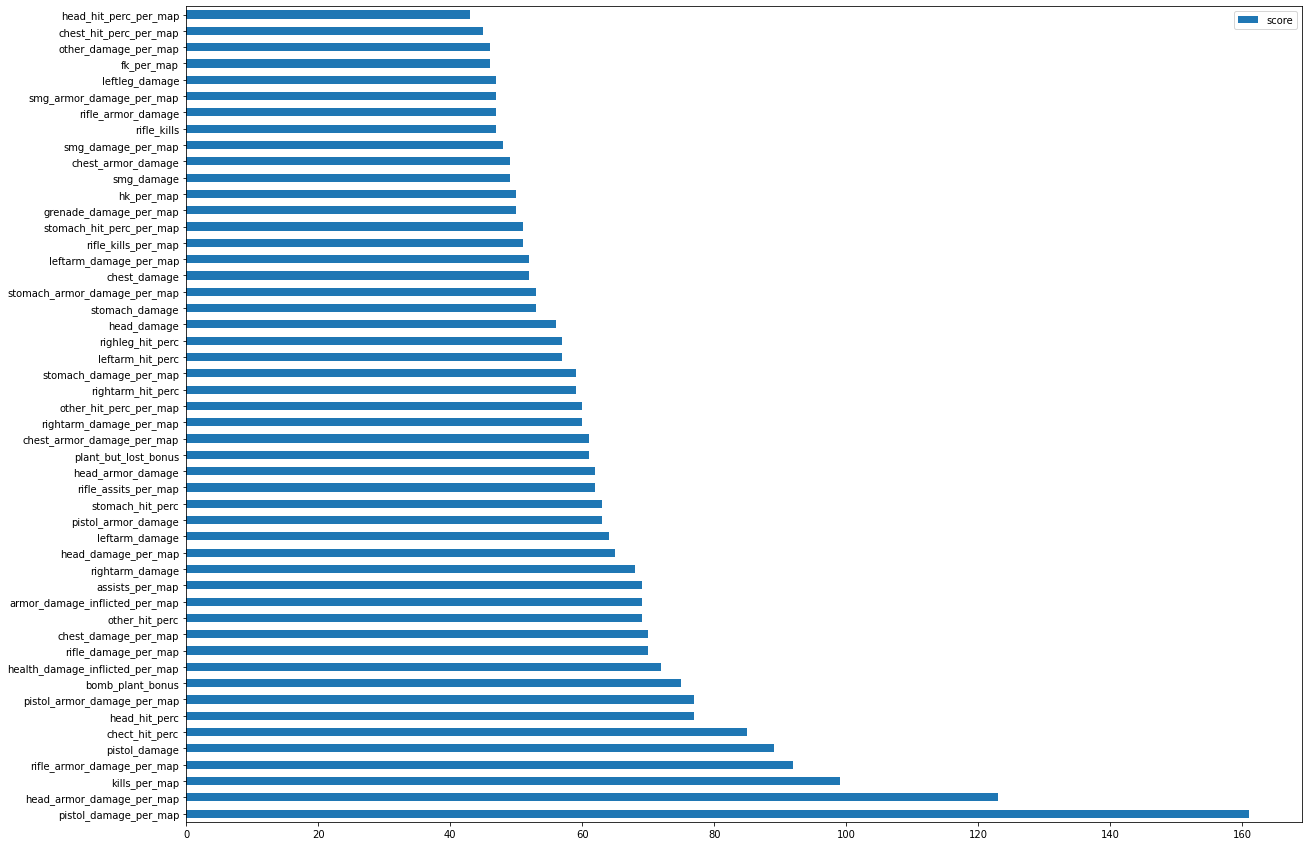

In [111]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(50, columns="score").plot(kind='barh', figsize = (20,15)) ## plot top 40 features


In [ ]:
# Total money seems to be the highest importance, so maybe if we were to pass in, 
# the aggregated stats we could on match level but not create a sum in total we could have an
# interesting result. 

# Things to test
# 1. Pass in money columns not as a sum
#       exp2: round_end_bonus is the most important by a long shot. So what factors lead to a high round end bonus,
#       ok so the thing with looking at kills per map, bomb plant bonus and from the previous experiments. Money is by far the most important 
#       thing to perdicting a csgo match. However, in the model we should be lookint at, what enables players to make the most money.
#       i.e. in experiment 3, kills_per_map, bomb_plant_bonus, and rifle kills are the 3 most important features when it comes to predictions.
#       However kills are a win condition, so the data we should feed the model should be more like, what enables a player to get a kill. 

#       I think something interesting to add hear would be shot accuracy. The amount of rounds a player starts witha a full buy, vs an eco
#       vs a force buy. 
#       Maybe the amount of players they can kill before a plant -> instead of kills this is damage
#       The number of times they take advantageous trades with their teammates, double peek etc. 
#       The amount of times they trade
#       the amount of times they lose trades
#           Trades amount seems to be to low to make a difference. Maybe duels would be better suited 
#           At least 1 for 1 ones. A double peek trade. How do I calculate thought. 
#           Maybe for double peek, we could use if a player has been damaged by by two players right before they die, and then group 
#           the player by location to see if they are close to each other
#               the problem with the above though is what if one player is taken out instantly before hitting a shot which happens fairly often
#       Opening frag

#       the amount of times they can force an opponent to eco
#       the amount of times they win an eco
#       the amount of times they win vs a full buy
#       percentage of time oppononent spent on eco, percentage of time they spent on eco
#       The amount of times they can entry frag succesfully
#       maybe adding damage in here could be useful as well, not kills
#       Utility level

#       exp4: we added damage percentages and the importance of money shot way down. the only bonuses in the feature importance where bomb_blant_bonus
#       and plant_but_lost_bonuss

# 2. Pass in T and CT side money stats
# 3. Pass in damage stats


# ---------------------
# So the above is all done from the perspective the match and the reason for that is because we are trying to predict the match outcome which consist
# of maps. Would ADR be a valid statistic here? 

# Do we need to drop a level and attempt to predict the map?



# Eco, Force, Full
# Here we can do something similar to how we calc round money. 
# We can make the assumption that its only pistols on the start of a half.
# So we could check the amount of money they made that round, but that doesn't account for saving. 

# so what if we did something like this:
#  1. Check how much money they made last round. If its not enough to afford an AK/M4 + armor/helm + util, we can then check if eco or force buy. 
#  2. We then have to check cpr, wf, and ph to get a weapon for them. Based off what weapon it  


In [106]:
from importlib import reload
import mlflow_service
reload(mlflow_service)
import mlflow
from typing import Dict, Tuple
from mlflow_service import MlFlowService

mlflow.set_tracking_uri('http://ec2-18-221-225-181.us-east-2.compute.amazonaws.com:5000')
mlflow.set_experiment('csgo_moneyline')

mlflow.start_run()
ml = MlFlowService()
ml.log_sklearn_model(
    model, 'csgo_moneyline', X_train, y_test, predictions, model_df.shape
)

mlflow.end_run()

/Users/matias/.local/share/virtualenvs/ModelNotebooks-OWhv5NqQ/lib/python3.9/site-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)
2022/05/16 19:48:35 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been

In [61]:
mlflow.end_run()